<a href="https://colab.research.google.com/github/MatheusABomfim/Qualifica-o_ML_HTLV/blob/main/MEST_HTLV%2BMBL2%2BCLINICAL_PreProcessing_and_defaultML_Avaliation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes/reminders:

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* This script is based on the file: "Based on the ML Wine data set" with the appropriate modifications.

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more complex).

# Dictionary:
* In column: SEX
  * M = 0
  * F = 1

* In column: HAM/TSP
 * No myelopathy = 0
 * HAM/TSP = 1

In [ ]:
# Att Scikit-learn
!pip uninstall scikit-learn
!pip install scikit-learn

# Install shap package (não consta no google colab)
!pip install shap #Corrigir erro do shap

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc, make_scorer, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.datasets import make_classification
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import learning_curve, train_test_split, StratifiedShuffleSplit

# Data selection
inicial_dataset = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/Clean_data_HAM_TSP.csv')
# Ignoring flags
import warnings
warnings.filterwarnings('ignore')

# Importing and processing data:

In [ ]:
# Import initial file "Clean_data_HAM_TSP"
df = pd.read_table(inicial_dataset, sep='.')  # sep= separator parameter(;)

In [ ]:
# Checking the data frame
print(df)

In [ ]:
# Transformation of categorical nominal data into categorical numerical data:
df['SEXO'] = df['SEXO'].replace('M',0)
df['SEXO'] = df['SEXO'].replace('F',1)
df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO',0)
df['HAM/TSP'] = df['HAM/TSP'].replace('SIM',1)

# Elimination of data that is cloudy:
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]

# Delete columns that will not be used:
df = df.drop('SINTOMAS', axis=1)
df = df.drop('SINT. DET.', axis=1)
df = df.drop('ANO DE DIAGNOSTICO', axis=1)
df = df.drop('REGISTRO', axis=1)
df = df.drop('NUM AMO', axis=1)
df = df.drop('Baixo fluxo urinário', axis=1)
df = df.drop('Câimbras', axis=1)
df = df.drop('Edema MMSS', axis=1)

# Transforming string data into float64:
df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'],errors = 'coerce')

# Removal of rows with null values:
df = df.dropna()

In [ ]:
df.columns
#print(df)

Index(['SEXO', 'Idade 2018 (2019 AZUL)', 'HAM/TSP', 'MBL-550', 'MBL -221',
       'MBL EXON', 'Incontinência Urinária', 'dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia', 'Hipereflexia em MMII', 'Hiperatividade',
       'fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Diabetes', 'Obesidade', 'Depressão ', 'Ansiedade',
       'Poliaciúria', 'Esquizofrenia', 'Problemas nos MMII',
       'Doença psiquiátrica', 'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade de urinar',
       'Fraqueza ', 'Hipotireodismo', 'Descon

**Exploratory analysis**




Target frequency distribution (HAM/TSP)

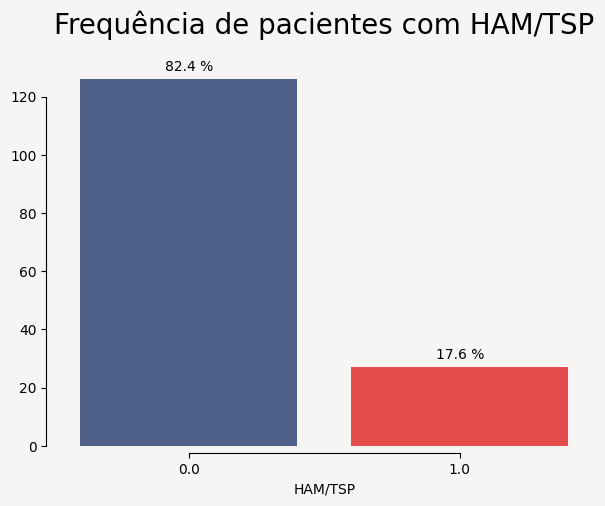

In [ ]:
# Color palette
mypal= ['#465d91', '#FFFFE0','#FF3232']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Frequência de pacientes com HAM/TSP', fontsize=20, y=1.05)
ax.set_ylabel('')
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in JPEG
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Qualificação/Exploratory Analysis/' + 'Frequência_HAM_TSP.jpeg')

In [ ]:
# Contar o número total de pacientes com HAM/TSP em relação ao DataFrame 'y'
pacientes_com_HAM_feminino = ((df['SEXO'] == 1) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Feminino com HAM/TSP: {pacientes_com_HAM_feminino}')

# Contar o número total de pacientes do sexo masculino sem HAM/TSP
pacientes_com_HAM_masculino = ((df['SEXO'] == 0) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Masculino com HAM/TSP: {pacientes_com_HAM_masculino}')

# Contar o número total de pacientes do sexo feminino sem HAM/TSP
pacientes_sem_HAM_feminino = ((df['SEXO'] == 1) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Feminino sem HAM/TSP: {pacientes_sem_HAM_feminino}')

# Contar o número total de pacientes do sexo masculino sem HAM/TSP
pacientes_sem_HAM_masculino = ((df['SEXO'] == 0) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Masculino sem HAM/TSP: {pacientes_sem_HAM_masculino}')


Pacientes do sexo Feminino com HAM/TSP: 21
Pacientes do sexo Masculino com HAM/TSP: 6
Pacientes do sexo Feminino sem HAM/TSP: 71
Pacientes do sexo Masculino sem HAM/TSP: 55


Pearson correlation matrix initial dataset (heatmap):

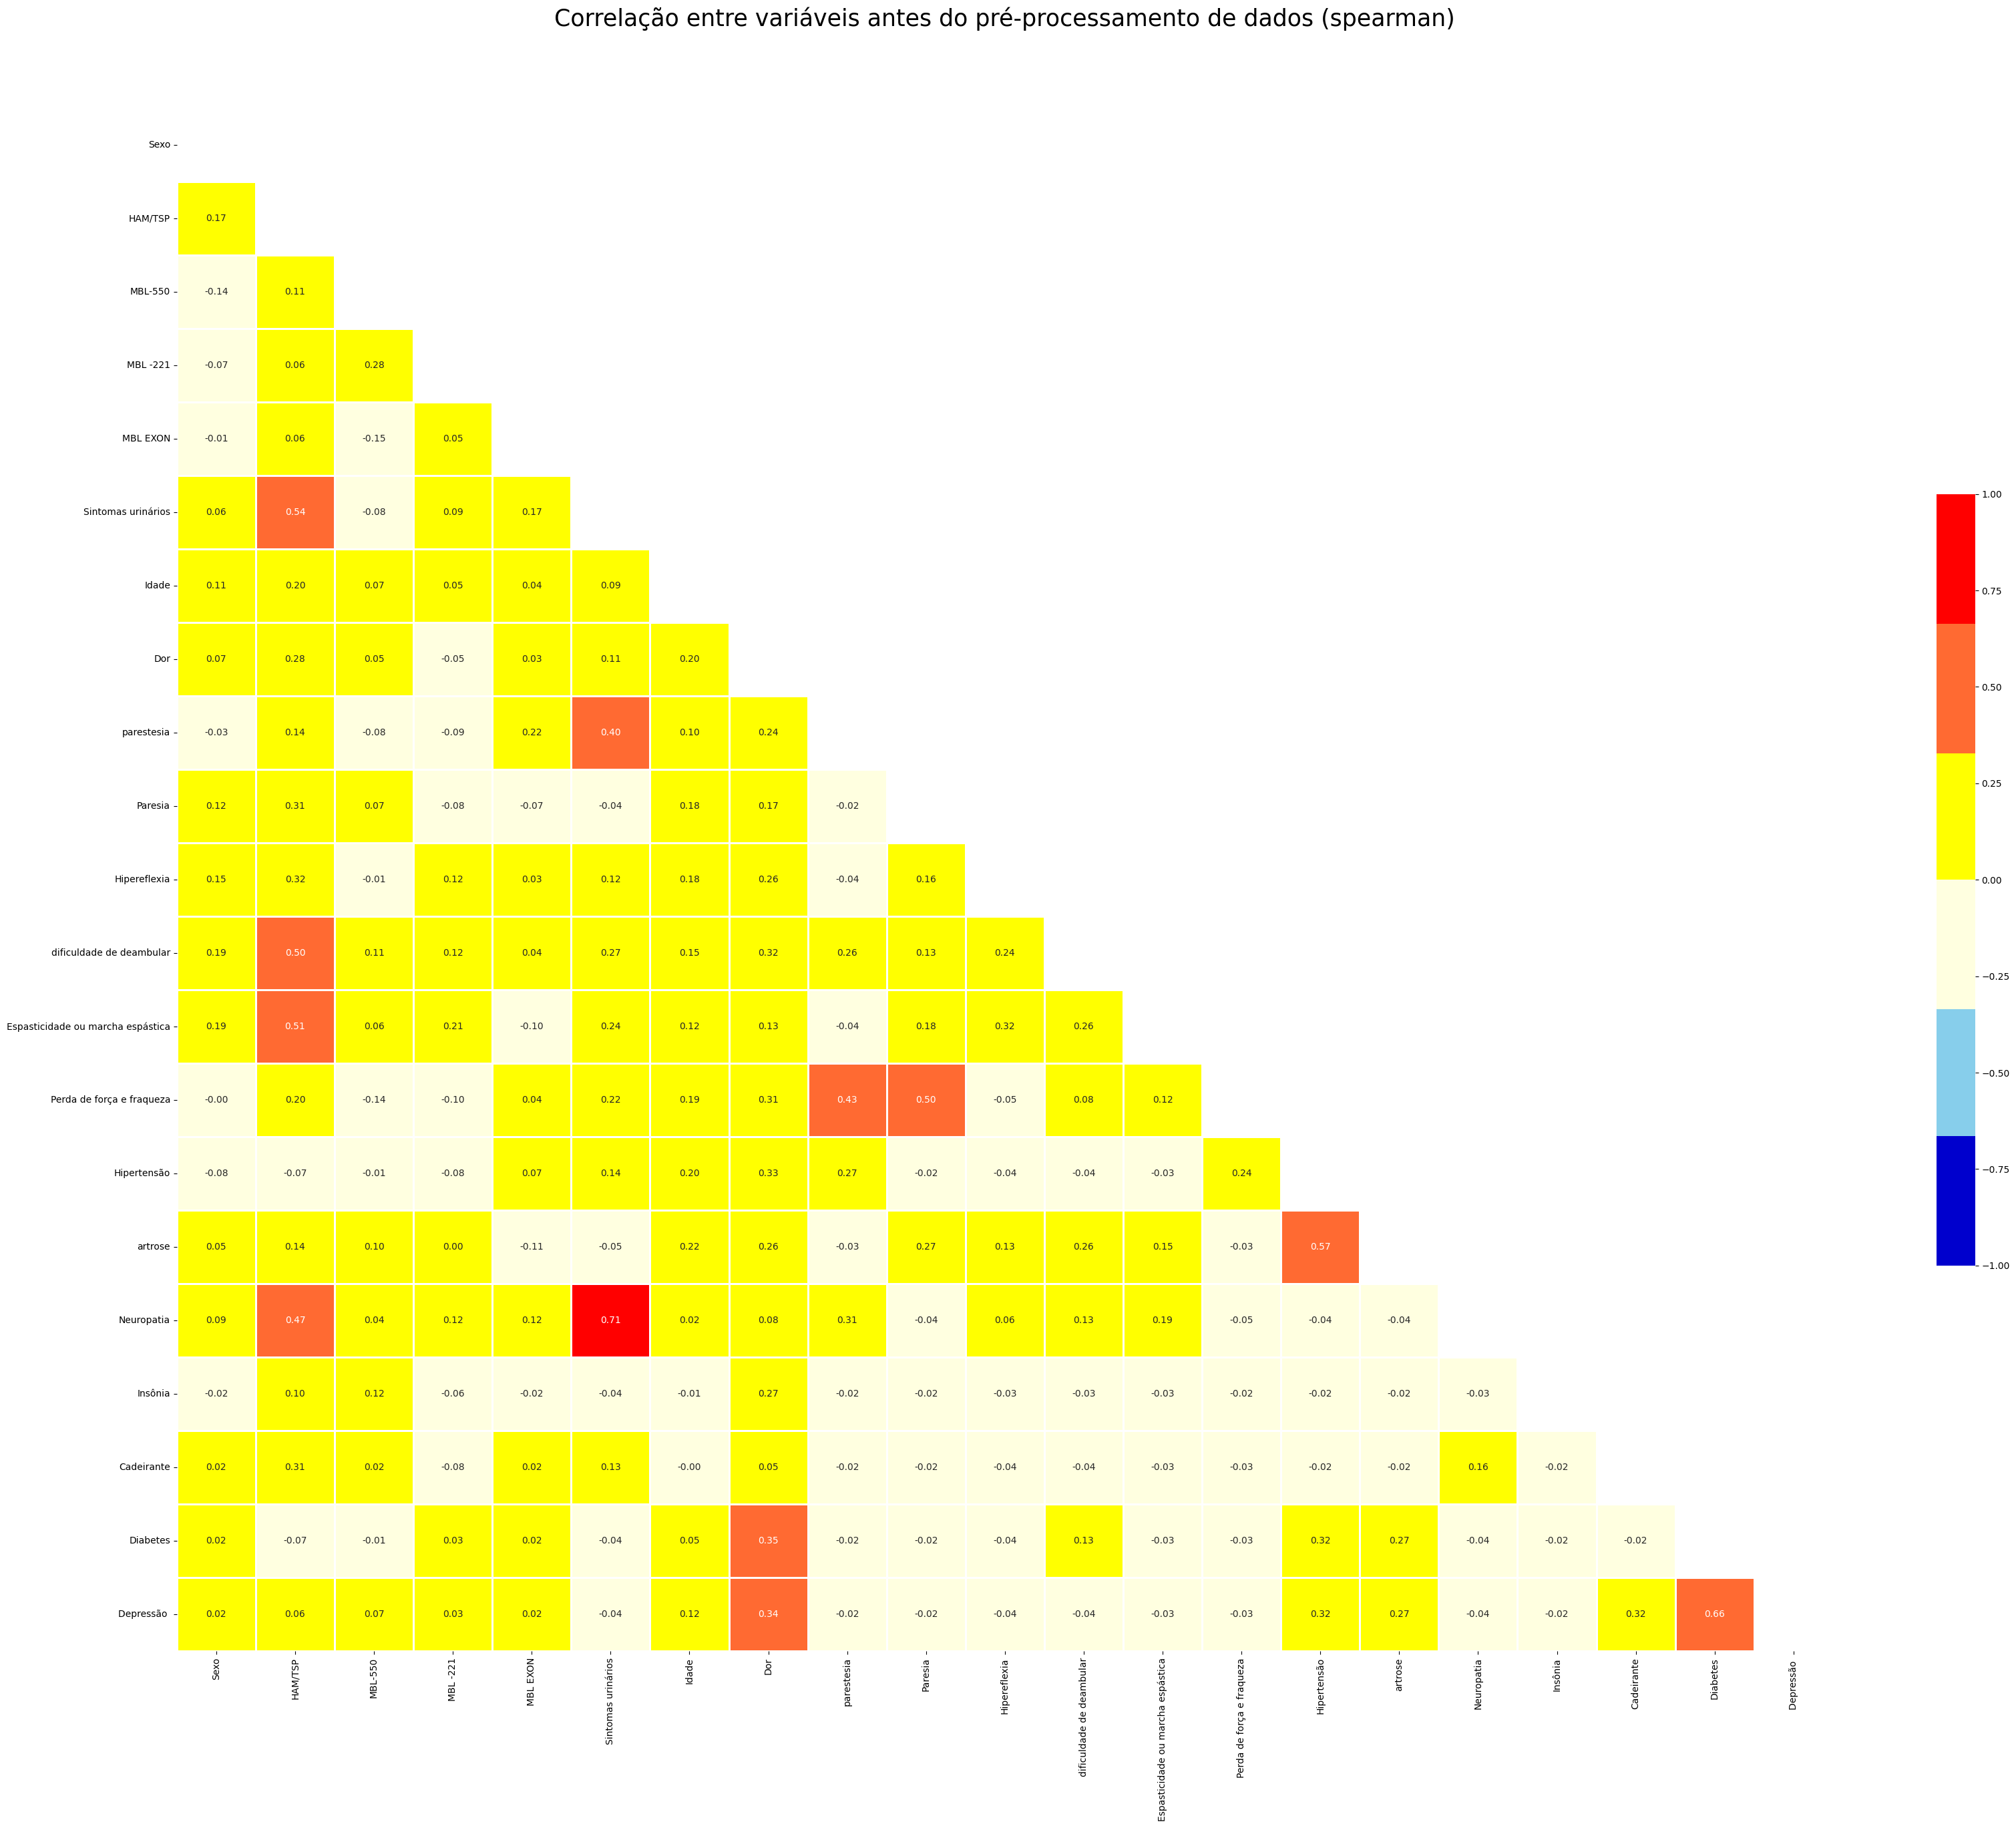

In [ ]:
# Correlation
mypal= ['#0000CD', '#87CEEB', '#FFFFE0','#FFFF00', '#ff6a32','#FF0000']
metodo_correlacao = "spearman"
df_ = df

#df_ = np.round(df_.reset_index(drop=True), 2)
corr = df_.corr(method= metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(40, 30), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f')
ax.set_title("Correlação entre variáveis antes do pré-processamento de dados ("+metodo_correlacao+")", fontsize=25, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Qualificação/Exploratory Analysis/' + 'initial_df_plot_heatmap_corr_pearson.pdf')

plt.show()

# **Evaluation of multicollinearity**

In [ ]:
# Adds a column of constants to the DataFrame
df_with_const = add_constant(df)

# List for storing VIF results
vif_data = []

# Identification of the 'HAM/TSP' column index in the DataFrame
index_ham_tsp = df.columns.get_loc('HAM/TSP')

# Function to calculate the VIF in relation to the 'HAM/TSP' column
def calculate_vif(column_index):
    return variance_inflation_factor(df.values, column_index)

# Calculate the VIF for each variable in relation to the 'HAM/TSP' column
for i, column in enumerate(df.columns):
    if column != 'const' and column != 'HAM/TSP':
        vif = calculate_vif(i)
        vif_data.append((column, vif))

# Convert the results into a DataFrame
vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

# Save the DataFrame in an Excel file
caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/VIF_data.xlsx'
vif_df.to_excel(caminho_arquivo, index=False, engine='openpyxl')

In [ ]:
print(df)

# **Filter feature selection**
Creation of a new data table, transforming the binary variables referring to urinary dysfunctions into categorical numerical variables, exclusion of uninformative columns and categorization of pain subtypes.

Dictionary:
- Urinary_symptoms:
  - Polyuria: 1
  - Neurogenic bladder: 2
  - Neurogenic bladder + urinary incontinence:3
  - Nocturia: 4
  - Nocturia + urinary incontinence: 5
  - Dysuria: 6
  - Dysuria + neurogenic bladder: 7

- Pain:
  - non-specific pain: 1
  - joint pain: 2
  - lower back pain: 3
  - lower limb pain: 4
  - lower limb pain + other site of pain: 5

- Weakenes:
  - normal levels of strength: 0
  - weakness or lost of stregth: 1

- Wandering:
  - normal walking: 0
  - abnormal walking: 1
  
  At this point, df is the new data set with the change in the selected characteristics

In [ ]:
# Path to the Excel file
cat_data = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat.csv'

# Import "cat data" file
df = pd.read_table(cat_data, sep=',')

# Removal of rows with null values:
df = df.dropna()

# show the DataFrame
print(df)

     Sexo  HAM/TSP  MBL-550  MBL -221  MBL EXON  Sintomas urinários  Idade  \
0       0        0        1         0         2                   6     68   
1       1        0        0         0         1                   0     32   
2       0        0        2         1         0                   0     54   
3       0        0        1         0         0                   0     36   
4       0        0        1         1         1                   0     41   
..    ...      ...      ...       ...       ...                 ...    ...   
148     1        0        2         0         0                   0     76   
149     1        0        1         0         0                   0     63   
150     1        0        1         0         0                   0     82   
151     0        0        2         0         0                   0     62   
152     1        0        2         0         0                   0     53   

     Dor  parestesia  Paresia  ...  dificuldade de deambular  \

In [ ]:
# Data scaling of "Idade" feature
scaler = MinMaxScaler()

# Apply the scaler to the dataset
df['Idade'] = scaler.fit_transform(df[['Idade']])

In [ ]:
df.columns

Index(['Sexo', 'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON',
       'Sintomas urinários', 'Idade', 'Dor', 'Parestesia', 'Paresia',
       'Hipereflexia', 'Dificuldade de deambular', 'Espasticidade', 'Fraqueza',
       'Hipertensão', 'Artrose', 'Neuropatia', 'Insônia', 'Cadeirante',
       'Diabetes', 'Depressão '],
      dtype='object')

In [ ]:
df = df.rename(columns={'parestesia':'Parestesia'})
df = df.rename(columns={'dificuldade de deambular':'Dificuldade de deambular'})
df = df.rename(columns={'artrose':'Artrose'})
df = df.rename(columns={'Espasticidade ou marcha espástica':'Espasticidade'})
df = df.rename(columns={'Perda de força e fraqueza':'Fraqueza'})
df = df.rename(columns={'Dificuldade de deambular':'Deambulação'})

**VIF for the new data frame, in order to identify possible multicollinearity**

In [ ]:
# Adds a column of constants to the DataFrame
df_with_const = add_constant(df)

# List to storage the VIF results
vif_data = []

# Index of the 'HAM/TSP' column in the DataFrame
index_ham_tsp = df.columns.get_loc('HAM/TSP')

# Function to calculate the VIF in relation to the 'HAM/TSP' column
def calculate_vif(column_index):
    return variance_inflation_factor(df.values, column_index)

# Calculate the VIF for each variable in relation to the 'HAM/TSP' column
for i, column in enumerate(df.columns):
    if column != 'const' and column != 'HAM/TSP':
        vif = calculate_vif(i)
        vif_data.append((column, vif))

# Convert the results into a DataFrame
vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

# Save the DataFrame in an Excel file
caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Qualificação/VIF/VIF_processed_data.xlsx'
vif_df.to_excel(caminho_arquivo, index=False, engine='openpyxl')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Qualificação/Exploratory Analysis/heatmap_corr_pearson.jpeg'

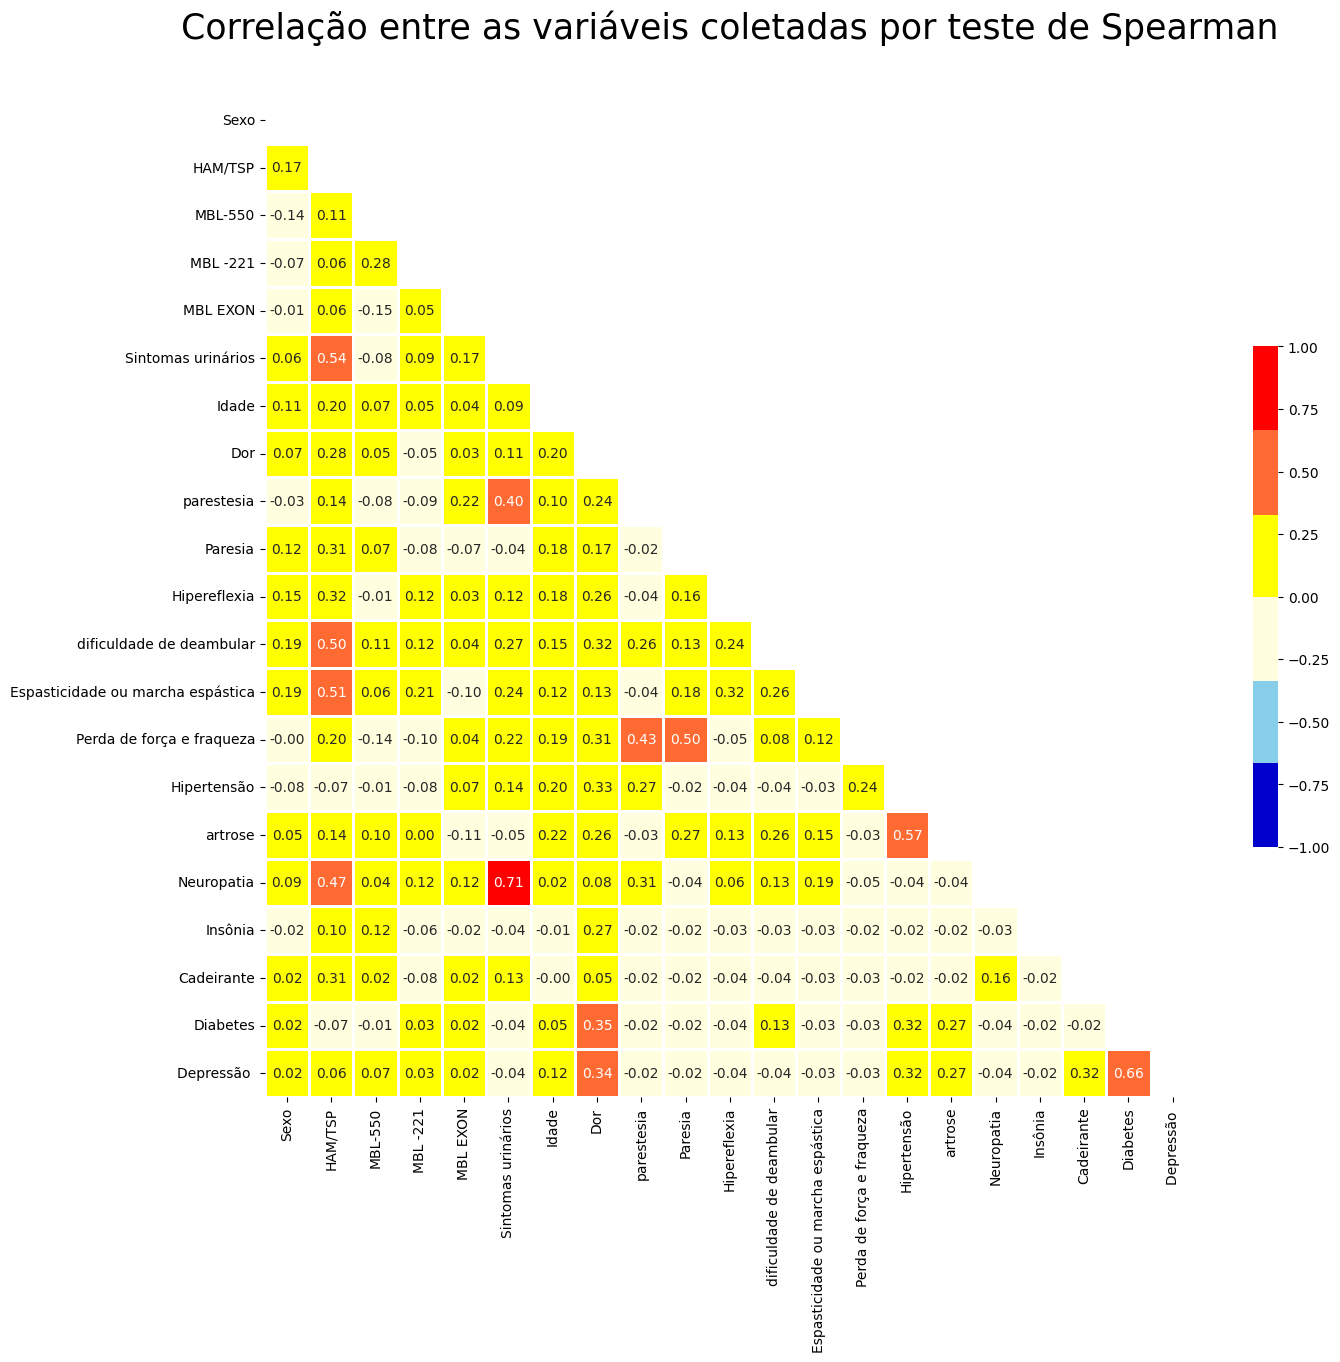

In [ ]:
# Correlation of cat_df
mypal= ['#0000CD', '#87CEEB', '#FFFFE0','#FFFF00', '#ff6a32','#FF0000']
metodo_correlacao = "spearman"
df_ = df
corr = df_.corr(method= metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 13), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f')
ax.set_title("Correlação entre as variáveis coletadas por teste de Spearman", fontsize=25, y= 1.05);


# Save the graphic as image
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Qualificação/Exploratory Analysis/' + 'heatmap_corr_pearson.jpeg')
plt.show()

In [ ]:
# Data division
# Binary categorical data
cat_bin = ['Sexo', 'Idade', 'HAM/TSP', 'Sintomas urinários', 'Dor',
        'parestesia', 'Paresia', 'Hipereflexia',
       'dificuldade de deambular', 'Espasticidade ou marcha espástica',
       'Perda de força e fraqueza', 'Hipertensão', 'artrose', 'Neuropatia',
       'Insônia', 'Cadeirante', 'Diabetes', 'Depressão ']

# Multiple categorical data
cat_mult= ['MBL-550', 'MBL -221', 'MBL EXON']

# All data
all_data = cat_bin + cat_mult

Cleaning non-numerical data with no predictive value for ML

In [ ]:
# Separate the variables into predictors and target variables (style);
y = df['HAM/TSP'] # Target variables;
x = df.drop('HAM/TSP', axis = 1) # Predict variables, without aim;

In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Sexo,153.0,0.601307,0.491237,0.0,0.000000,1.000000,1.000000,1.0
MBL-550,153.0,1.352941,0.653639,0.0,1.000000,1.000000,2.000000,2.0
MBL -221,153.0,0.248366,0.448404,0.0,0.000000,0.000000,0.000000,2.0
MBL EXON,153.0,0.614379,0.539544,0.0,0.000000,1.000000,1.000000,2.0
Sintomas urinários,153.0,0.300654,1.124400,0.0,0.000000,0.000000,0.000000,7.0
Idade,153.0,0.509353,0.231072,0.0,0.327586,0.517241,0.672414,1.0
Dor,153.0,0.464052,1.141480,0.0,0.000000,0.000000,0.000000,5.0
Parestesia,153.0,0.026144,0.160087,0.0,0.000000,0.000000,0.000000,1.0
Paresia,153.0,0.019608,0.139104,0.0,0.000000,0.000000,0.000000,1.0
Hipereflexia,153.0,0.058824,0.236067,0.0,0.000000,0.000000,0.000000,1.0


#**Cross-validation + ROC Curve + Mean AUC for default hyperparameters**


In [ ]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state= 42),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state= 42),
    RandomForestClassifier(random_state= 42),
    AdaBoostClassifier(random_state= 42),
    GradientBoostingClassifier(random_state= 42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
]

# Initialize StratifiedKFold
skf = StratifiedKFold(5)

# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):
    tprs = []
    aucs = []
    f1_m = []
    mean_fpr = np.linspace(0, 1, 100)

# Testing the model
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)): # metrics
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item.fit(x_train, y_train)

# Ploting avaliative metrics of ROC curve
        y_proba = item.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f"AUROC = {roc_auc:.2f})")
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f"Média da curva ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=3, alpha=0.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)


    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 Desvio padrão.')
    plt.xlabel('Taxa de falso positivo', fontsize=15)
    plt.ylabel('Taxa de verdadeiro positivo', fontsize=15)
    plt.title(nome, fontsize=25)
    plt.legend(loc="lower right")
    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Qualificação/ROC Curve/' + 'Curva ROC ' + nome + '.jpeg')
    plt.show()


# Calculation and print of F1 and associated metrics
    precision_mean_score = cross_val_score(item, x, y, scoring="precision", cv=5).mean()
    std_score = cross_val_score(item, x, y, scoring="precision", cv=5).std()
    accuracy_mean_score = cross_val_score(item, x, y, scoring="accuracy", cv=5).mean()
    recall_mean_score = cross_val_score(item, x, y, scoring="recall", cv=5).mean()
    f1_mean_score = cross_val_score(item, x, y, scoring="f1", cv=5).mean()

    print(f"Média da precisão: {precision_mean_score}")
    print(f"Media do desvio padrão: {std_score}")
    print(f"Média da acurácia: {accuracy_mean_score}")
    print(f"Media da taxa de recall: {recall_mean_score}")
    print(f"Media do parâmetro f1: {f1_mean_score}")

# Creating the data frames that  values to be saved
    results_mean_precision = pd.DataFrame({'Precision Mean': [precision_mean_score]})
    results_mean_accuracy = pd.DataFrame({'Accuracy Mean': [accuracy_mean_score]})
    results_mean_recall = pd.DataFrame({'Recall Mean': [recall_mean_score]})
    results_mean_f1 = pd.DataFrame({'F1 Mean': [f1_mean_score]})

# Creating the data frames (with the values of interest) that will be plotted in txt file
    f1_metrics = pd.DataFrame(
    [{
        "Nome": nome,
        "Accuracy": results_mean_accuracy.iloc[0]['Accuracy Mean'],
        "Recall": results_mean_recall.iloc[0]['Recall Mean'],
        "Precision": results_mean_precision.iloc[0]['Precision Mean'],
        "F1 Score": results_mean_f1.iloc[0]['F1 Mean'],
    }]
)
    f1_m.append(f1_metrics)
    data_table = pd.concat(f1_m, ignore_index=True)
data_table = np.round(data_table.reset_index(drop=True), 2)

# Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
      .style.background_gradient(cmap='coolwarm')\
      .bar(subset=['Recall'], color='#ff355d')\
      .bar(subset=['Precision'], color='lightseagreen')\
      .bar(subset=['F1 Score'], color='gold')\

# Save the generated excel file
styled_table.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Qualificação/F1 metrics/'+"F1_metrics.xlsx", engine='openpyxl')

# **Confunsion matrix**

In [ ]:
# Initialize a dictionary to store the average confusion matrices of all the models
all_matrices = {}

classifiers = [
    LogisticRegression(solver="liblinear", random_state=42),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state= 42),
    RandomForestClassifier(random_state= 42),
    AdaBoostClassifier(random_state= 42),
    GradientBoostingClassifier(random_state= 42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
]

# Define a list of names corresponding to the classifiers
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
]

skf = StratifiedKFold(5)
# Loop with classifiers
for classifier, name in zip(classifiers, names):
    # Initialize a cumulative confusion matrix for this model
    cumulative_matrix = np.zeros((2, 2), dtype=int)

    # Loop about the folds (data set partitions)
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Training model
        classifier.fit(x_train, y_train)

        # Making predictions on the test set
        pred = classifier.predict(x_test)

        # Calculate the confusion matrix
        matriz = confusion_matrix(y_test, pred)

        # Add the confusion matrix to the cumulative_matrix
        cumulative_matrix += matriz

    # Calculate the mean of confunsion matrix
    average_matrix = cumulative_matrix / skf.n_splits

    # Normalize the confusion matrix to obtain percentages
    row_sums = average_matrix.sum(axis=1, keepdims=True)
    normalized_matrix = (average_matrix / row_sums) * 100

    # Add the average to the matrix dictionary of all models
    all_matrices[name] = normalized_matrix

# Plot the average confusion matrix for each model
for name, matriz in all_matrices.items():
    plt.figure(figsize=(10, 7))
    sns.heatmap(matriz, annot=True, cmap='OrRd', fmt='.2f', annot_kws={"size": 25})
    plt.xlabel('Predições', fontsize=15)
    plt.ylabel('Verdadeiramente positivas', fontsize=15)
    plt.title(f'{name}', fontsize=38)
    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Qualificação/Confunsion matrix/' + f'Matriz de confusão {name}.jpeg')
    plt.show()


NameError: name 'LogisticRegression' is not defined

# **Learning curves analysis**

**Performance Learning Curves:**

In [ ]:
# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=42),
    KNeighborsClassifier(n_neighbors=2),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
]

# Define the training set sizes for which you want to calculate the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # Aqui, estamos dividindo o intervalo de 0.1 a 1.0 em 10 partes iguais

for item, nome in zip(classifiers, names):
    train_scores_mean = []
    train_scores_std = []
    test_scores_mean = []
    test_scores_std = []

    # Divide the data into training and validation sets
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

    for train_index, val_index in sss.split(x, y):
        x_train, x_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Calculate the learning curves
        train_sizes_abs, train_scores, test_scores = learning_curve(item, x_train, y_train, cv=5, scoring='accuracy')

        # Calculate the mean and standard deviation of the training and test scores
        train_scores_mean.append(np.mean(train_scores, axis=1))
        train_scores_std.append(np.std(train_scores, axis=1))
        test_scores_mean.append(np.mean(test_scores, axis=1))
        test_scores_std.append(np.std(test_scores, axis=1))

# Plot the learning curve
    plt.figure()
    plt.title(f"Curvas de aprendizagem de treino e validação para {nome}")
    plt.xlabel("Número de amostras utilizadas (%)")
    plt.ylabel("Acurácia")
    plt.grid()

# Calculate the averages and standard deviations over all the splits
    train_scores_mean = np.mean(train_scores_mean, axis=0)
    train_scores_std = np.mean(train_scores_std, axis=0)
    test_scores_mean = np.mean(test_scores_mean, axis=0)
    test_scores_std = np.mean(test_scores_std, axis=0)

    plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
             label="Acurácia do grupo treino")
    plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
             label="Acurácia do grupo teste")

    plt.legend(loc="best")
    plt.show()
